<a href="https://colab.research.google.com/github/dinilsonpedroza/Jupyter/blob/main/invctxj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Começamos importando as bibliotecas que usaremos no trabalho.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
invcart = pd.read_csv('/content/txj2.csv', decimal = ',') ### lendo o arquivo com decimais separados por vírgulas.

O arquivo *invcart* foi montado com dados obtidos no módulo de séries temporais  do site do banco central (www.bcb.gov.br, em sequida *estatísticas* e *séries temporais*. São dados sobre entrada de capitais (em carteira) e taxa média de juros mensal, 

In [ ]:
invcart

,txj,invc
0,2.04,880.9
1,2.07,1281.2
2,2.07,1417.1
3,2.05,1604.4
4,2.07,4126.4
...,...,...
122,1.53,5364.3
123,1.53,5904.2
124,1.56,5930.9
125,1.61,4544.4


In [ ]:
invcart['data'] = pd.date_range(start='03/01/2011', periods=len(invcart.txj), freq='M') ### acrescentando uma coluna de data.

In [ ]:
invcart

,txj,invc,data
0,2.04,880.9,2011-03-31
1,2.07,1281.2,2011-04-30
2,2.07,1417.1,2011-05-31
3,2.05,1604.4,2011-06-30
4,2.07,4126.4,2011-07-31
...,...,...,...
122,1.53,5364.3,2021-05-31
123,1.53,5904.2,2021-06-30
124,1.56,5930.9,2021-07-31
125,1.61,4544.4,2021-08-31


In [ ]:
invcart.invc = invcart.invc.pct_change() ### transformando a coluna de invc em variações percentuais.

In [ ]:
invcart

,txj,invc,data
0,2.04,NaN,2011-03-31
1,2.07,0.454422,2011-04-30
2,2.07,0.106072,2011-05-31
3,2.05,0.132171,2011-06-30
4,2.07,1.571927,2011-07-31
...,...,...,...
122,1.53,-0.181722,2021-05-31
123,1.53,0.100647,2021-06-30
124,1.56,0.004522,2021-07-31
125,1.61,-0.233776,2021-08-31


Por causa da variação percentual, perdemos uma informação (a primeira, claro).

In [ ]:
invcart = invcart.drop([0], axis=0) ### Excluindo a primeira linha do data frame.

In [ ]:
invcart

,txj,invc,data
1,2.07,0.454422,2011-04-30
2,2.07,0.106072,2011-05-31
3,2.05,0.132171,2011-06-30
4,2.07,1.571927,2011-07-31
5,2.03,-0.717090,2011-08-31
...,...,...,...
122,1.53,-0.181722,2021-05-31
123,1.53,0.100647,2021-06-30
124,1.56,0.004522,2021-07-31
125,1.61,-0.233776,2021-08-31


Eliminamos a primeira linha, para deixar a série homogênea, já que perdemos uma informação na operação anterior.

**Gráfico de dispersão**

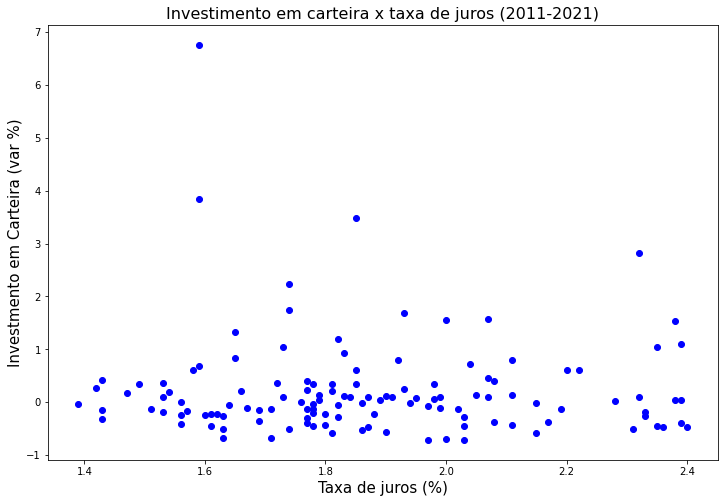

In [ ]:
plt.scatter(invcart.txj, invcart.invc, c='blue')
plt.title('Investimento em carteira x taxa de juros (2011-2021)',fontsize = 16)
plt.ylabel("Investmento em Carteira (var %)", fontsize = 15)
plt.xlabel("Taxa de juros (%)",fontsize = 15)
plt.show() ### Gráfico de dispersão entre investimento em carteira e taxa de juros.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


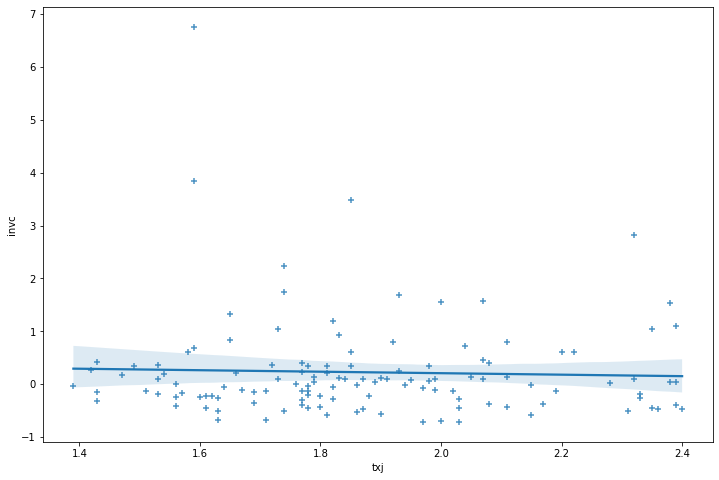

In [ ]:
sns.regplot(invcart.txj, invcart.invc, marker="+")### Gráfico de dispersão mais reta de regressão.

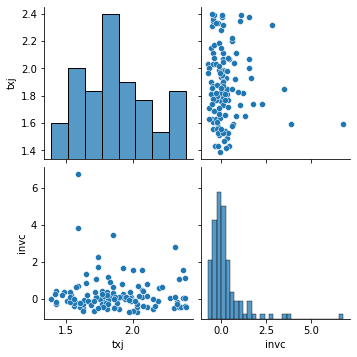

In [ ]:
sns.pairplot(invcart) ### Observando correlações entre as variáveis co o pairplot.

Há, portanto, uma correlação muito baixa entre as duas variáveis, *entrada de capitais em carteira* e *taxa de juros internos.

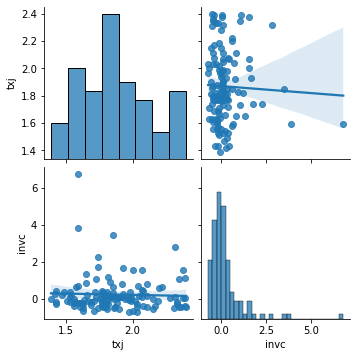

In [ ]:
sns.pairplot(invcart, kind='reg') ### pairplot com reta de regressão.

**Calculando a correlação**

In [ ]:
invcart1 = invcart.drop(['data'], axis=1) ### Excluindo a coluna de datas do data frame.

In [ ]:
invcart1

,txj,invc
1,2.07,0.454422
2,2.07,0.106072
3,2.05,0.132171
4,2.07,1.571927
5,2.03,-0.717090
...,...,...
122,1.53,-0.181722
123,1.53,0.100647
124,1.56,0.004522
125,1.61,-0.233776


In [ ]:
invcart1.corr() ### calculando a correlação entre as duas variáveis.

,txj,invc
txj,1.000000,-0.038126
invc,-0.038126,1.000000


In [ ]:
invcart.corr()

,txj,invc
txj,1.000000,-0.038126
invc,-0.038126,1.000000


**Raspagem**

---

Vamos agora estudar a relação entre investimentos diretos e PIB.

*Investimentos Diretos no Brasil*

In [ ]:
link= 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.22891/dados?formato=json' ### Estamos iniciando o processo de *raspagem* de dados.

In [ ]:
IDE = pd.read_json(link)

Na raspagem de dados, estamos usando uma função do *Pandas* que permite trazer para nosso espaço de trabalho um objeto arquivado em **Json** (*Java Script Object Notation*, formato ideal para transferência de arquivos). Para que a operação seja possível, é necessário que o site onde pegamos os dados disponha de **API** (*Application Programming Interface*, rotinas que facilitam a transferênica de dados em sites nos quais eles esteja arquivados).

In [ ]:
IDE ### De investimento direto.

,data,valor
0,01/01/1995,437.6
1,01/02/1995,156.7
2,01/03/1995,146.4
3,01/04/1995,96.4
4,01/05/1995,386.2
...,...,...
316,01/05/2021,1565.9
317,01/06/2021,2832.1
318,01/07/2021,3953.3
319,01/08/2021,2298.1


In [ ]:
IDE.index = pd.to_datetime(IDE['data']) ### Estamos aqui substituindo a coluna *Index* pela de datas do próprio arquivo.

In [ ]:
IDE

,data,valor
data,,
1995-01-01,01/01/1995,437.6
1995-01-02,01/02/1995,156.7
1995-01-03,01/03/1995,146.4
1995-01-04,01/04/1995,96.4
1995-01-05,01/05/1995,386.2
...,...,...
2021-01-05,01/05/2021,1565.9
2021-01-06,01/06/2021,2832.1
2021-01-07,01/07/2021,3953.3


In [ ]:
BPIDE = IDE['valor'] ### Estamos eliminando a coluna de datas antiga.

In [ ]:
BPIDE

data
1995-01-01     437.6
1995-01-02     156.7
1995-01-03     146.4
1995-01-04      96.4
1995-01-05     386.2
               ...  
2021-01-05    1565.9
2021-01-06    2832.1
2021-01-07    3953.3
2021-01-08    2298.1
2021-01-09    4155.1
Name: valor, Length: 321, dtype: float64

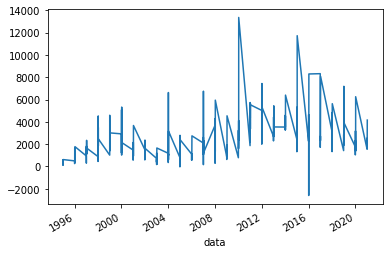

In [ ]:
BPIDE.plot()

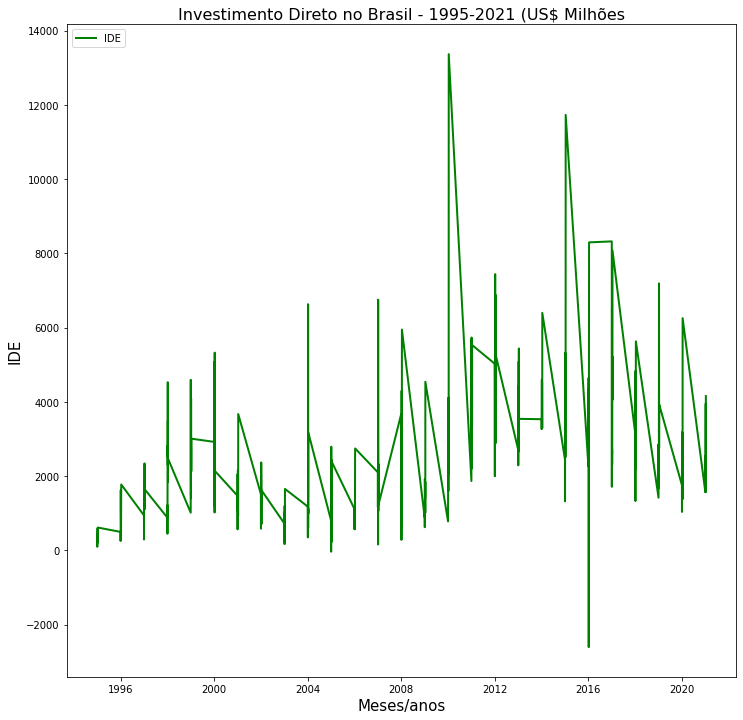

In [ ]:
plt.rcParams['figure.figsize'] = (12,12)
plt.title('Investimento Direto no Brasil - 1995-2021 (US$ Milhões',fontsize = 16)
plt.plot(BPIDE,lw =2, label = 'IDE', c= 'g')
plt.ylabel("IDE",fontsize = 15)
plt.xlabel('Meses/anos',fontsize = 15)
plt.legend(loc = 'upper left')

*PIB*

In [ ]:
link2= 'https://apisidra.ibge.gov.br/values/t/6784/n1/all/v/9810/p/all/d/v9810%201'

In [ ]:
PIB = pd.read_json(link2)

In [ ]:
PIB

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Ano (Código),Ano
1,1,Brasil,2,%,2.2,1,Brasil,9810,PIB - variação em volume,1996,1996
2,1,Brasil,2,%,3.4,1,Brasil,9810,PIB - variação em volume,1997,1997
3,1,Brasil,2,%,0.3,1,Brasil,9810,PIB - variação em volume,1998,1998
4,1,Brasil,2,%,0.5,1,Brasil,9810,PIB - variação em volume,1999,1999
5,1,Brasil,2,%,4.4,1,Brasil,9810,PIB - variação em volume,2000,2000
6,1,Brasil,2,%,1.4,1,Brasil,9810,PIB - variação em volume,2001,2001
7,1,Brasil,2,%,3.1,1,Brasil,9810,PIB - variação em volume,2002,2002
8,1,Brasil,2,%,1.1,1,Brasil,9810,PIB - variação em volume,2003,2003
9,1,Brasil,2,%,5.8,1,Brasil,9810,PIB - variação em volume,2004,2004


In [ ]:
Pib = PIB.drop([0], axis=0) ### Excluindo a primeira linha do data frame, para permitir a leitura.

In [ ]:
Pib

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
1,1,Brasil,2,%,2.2,1,Brasil,9810,PIB - variação em volume,1996,1996
2,1,Brasil,2,%,3.4,1,Brasil,9810,PIB - variação em volume,1997,1997
3,1,Brasil,2,%,0.3,1,Brasil,9810,PIB - variação em volume,1998,1998
4,1,Brasil,2,%,0.5,1,Brasil,9810,PIB - variação em volume,1999,1999
5,1,Brasil,2,%,4.4,1,Brasil,9810,PIB - variação em volume,2000,2000
6,1,Brasil,2,%,1.4,1,Brasil,9810,PIB - variação em volume,2001,2001
7,1,Brasil,2,%,3.1,1,Brasil,9810,PIB - variação em volume,2002,2002
8,1,Brasil,2,%,1.1,1,Brasil,9810,PIB - variação em volume,2003,2003
9,1,Brasil,2,%,5.8,1,Brasil,9810,PIB - variação em volume,2004,2004
10,1,Brasil,2,%,3.2,1,Brasil,9810,PIB - variação em volume,2005,2005


In [ ]:
Pib.index = pd.to_datetime(Pib['D3C']) ### Tansformando a coluna Index em data.

In [ ]:
Pib

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
D3C,,,,,,,,,,,
1996-01-01,1,Brasil,2,%,2.2,1,Brasil,9810,PIB - variação em volume,1996,1996
1997-01-01,1,Brasil,2,%,3.4,1,Brasil,9810,PIB - variação em volume,1997,1997
1998-01-01,1,Brasil,2,%,0.3,1,Brasil,9810,PIB - variação em volume,1998,1998
1999-01-01,1,Brasil,2,%,0.5,1,Brasil,9810,PIB - variação em volume,1999,1999
2000-01-01,1,Brasil,2,%,4.4,1,Brasil,9810,PIB - variação em volume,2000,2000
2001-01-01,1,Brasil,2,%,1.4,1,Brasil,9810,PIB - variação em volume,2001,2001
2002-01-01,1,Brasil,2,%,3.1,1,Brasil,9810,PIB - variação em volume,2002,2002
2003-01-01,1,Brasil,2,%,1.1,1,Brasil,9810,PIB - variação em volume,2003,2003
2004-01-01,1,Brasil,2,%,5.8,1,Brasil,9810,PIB - variação em volume,2004,2004


In [ ]:
pib = Pib['V'] ### Estamos eliminando a coluna de datas antiga.

In [ ]:
pib

D3C
1996-01-01     2.2
1997-01-01     3.4
1998-01-01     0.3
1999-01-01     0.5
2000-01-01     4.4
2001-01-01     1.4
2002-01-01     3.1
2003-01-01     1.1
2004-01-01     5.8
2005-01-01     3.2
2006-01-01     4.0
2007-01-01     6.1
2008-01-01     5.1
2009-01-01    -0.1
2010-01-01     7.5
2011-01-01     4.0
2012-01-01     1.9
2013-01-01     3.0
2014-01-01     0.5
2015-01-01    -3.5
2016-01-01    -3.3
2017-01-01     1.3
2018-01-01     1.8
2019-01-01     1.2
Name: V, dtype: object

In [ ]:
pibr = pib.astype(float) ### Convertendo a arquivo para uma formato númerico (flat).

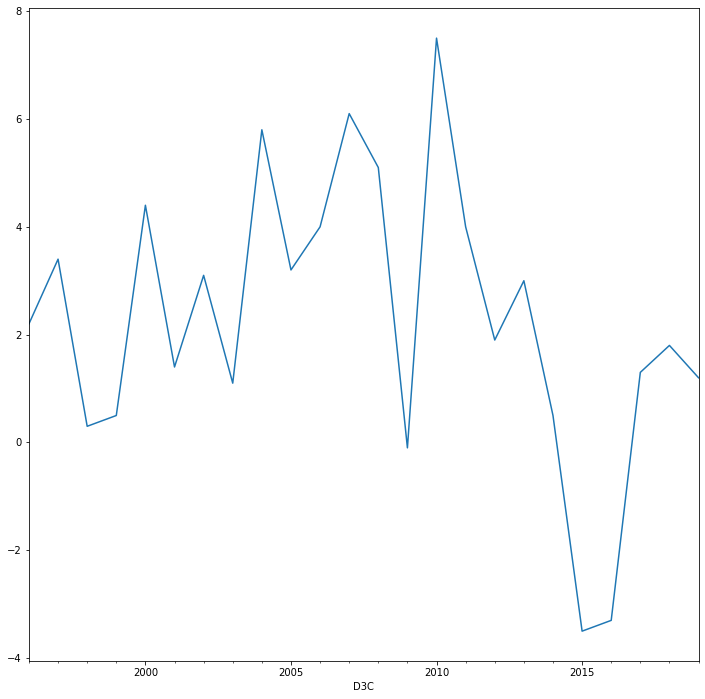

In [ ]:
pibr.plot()

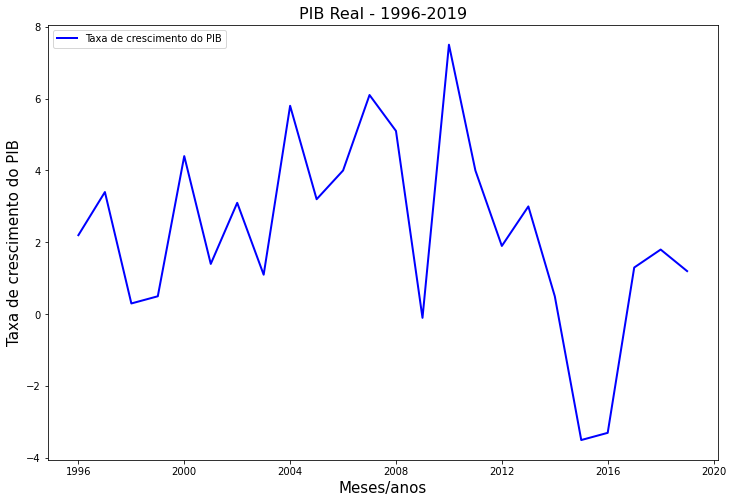

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('PIB Real - 1996-2019',fontsize = 16)
plt.plot(pibr,lw =2, label = 'Taxa de crescimento do PIB', c= 'b')
plt.ylabel("Taxa de crescimento do PIB",fontsize = 15)
plt.xlabel('Meses/anos',fontsize = 15)
plt.legend(loc = 'upper left')